# Учебный блокнот Julia: Модель Мальтузианского роста

# Julia Notebook: Malthusian Growth Model

# Часть 3: Основы популяционной динамики

# Part 3: Basics of Population Dynamics

## Моделирование мальтузианского роста

## Modeling Malthusian Growth

**Введение / Introduction**

В этом блокноте мы рассмотрим простейшую модель роста популяции, предложенную Томасом Мальтусом в 1798 году. Несмотря на свою простоту, она является фундаментом для понимания более сложных экологических и биологических систем.
In this notebook, we will examine the simplest population growth model, proposed by Thomas Malthus in 1798. Despite its simplicity, it forms the foundation for understanding more complex ecological and biological systems.

**Что мы изучим / What we will learn:**

1.  Математическая формулировка модели.
    Mathematical formulation of the model.
2.  Численное решение дифференциальных уравнений в Julia.
    Numerical solution of differential equations in Julia.
3.  Визуализация результатов.
    Visualization of results.
4.  Анализ ограничений и областей применения.
    Analysis of limitations and areas of application.

## 1. Теоретическая основа

## 1. Theoretical Background

**Уравнение роста / Growth Equation**

Мальтузианская модель предполагает, что скорость роста популяции пропорциональна текущему размеру популяции.
The Malthusian model assumes that the rate of population growth is proportional to the current population size.

$$ \frac{dN}{dt} = r \cdot N $$

Где / Where:

*   $N(t)$ — размер популяции в момент времени $t$ (population size at time $t$).
*   $r$ — удельная скорость роста (рождаемость минус смертность) (specific growth rate (birth rate minus death rate)).
*   $t$ — время (time).

**Аналитическое решение / Analytical Solution**

Это дифференциальное уравнение имеет известное точное решение:
This differential equation has a known exact solution:

$$ N(t) = N_0 \cdot e^{r \cdot t} $$

Где $N_0$ — начальная популяция.
Where $N_0$ is the initial population.

In [1]:
# ==============================================================================
# ПОДГОТОВКА ОКРУЖЕНИЯ / ENVIRONMENT SETUP
# ==============================================================================

# Если пакеты не установлены, раскомментируйте следующие строки:
# If packages are not installed, uncomment the following lines:
# using Pkg
# Pkg.add("DifferentialEquations")
# Pkg.add("Plots")
# Pkg.add("LaTeXStrings")

# Импорт необходимых библиотек
# Import necessary libraries
using DifferentialEquations  # Для решения дифференциальных уравнений / For solving ODEs
using Plots                  # Для построения графиков / For plotting
using LaTeXStrings           # Для красивых математических формул на графиках / For nice math formulas on plots

# Настройка темы графиков для лучшей читаемости
# Set plot theme for better readability
gr() # Используем бэкенд GR / Using GR backend

Plots.GRBackend()

## 2. Реализация модели в Julia

## 2. Model Implementation in Julia

В научном программировании на Julia мы обычно используем пакет `DifferentialEquations.jl`. Даже для простых задач это хорошая практика, так как она позволяет легко масштабировать код до сложных систем.
In scientific programming with Julia, we typically use the `DifferentialEquations.jl` package. Even for simple tasks, this is good practice as it allows easy scaling of code to complex systems.

Мы определим функцию, которая описывает правую часть уравнения $dN/dt$.
We will define a function that describes the right-hand side of the equation $dN/dt$.

---

## 

In [2]:
# ==============================================================================
# ОПРЕДЕЛЕНИЕ МОДЕЛИ / MODEL DEFINITION
# ==============================================================================

"""
    malthus_model!(du, u, p, t)

Функция, вычисляющая производную популяции.
Function computing the population derivative.

Аргументы / Arguments:
- `du`: вектор для записи производной (outplace) / vector to store derivative (outplace)
- `u`: текущее состояние системы (популяция N) / current system state (population N)
- `p`: параметры модели (в данном случае [r]) / model parameters (in this case [r])
- `t`: текущее время / current time
"""
function malthus_model!(du, u, p, t)
    # Распаковываем параметры
    # Unpack parameters
    r = p[1] 
    
    # Текущая популяция
    # Current population
    N = u[1]
    
    # Уравнение: dN/dt = r * N
    # Equation: dN/dt = r * N
    du[1] = r * N
end


malthus_model!

In [3]:

# ==============================================================================
# ПАРАМЕТРЫ СИМУЛЯЦИИ / SIMULATION PARAMETERS
# ==============================================================================

# Начальная популяция (например, 100 бактерий)
# Initial population (e.g., 100 bacteria)
N0 = [100.0] 

# Скорость роста (например, 0.5 в единицу времени)
# Growth rate (e.g., 0.5 per time unit)
# r > 0 означает рост, r < 0 означает вымирание
# r > 0 means growth, r < 0 means extinction
r_value = 0.5 
p = [r_value]

# Временной интервал: от 0 до 10 единиц времени
# Time span: from 0 to 10 time units
tspan = (0.0, 10.0)


(0.0, 10.0)

In [4]:

# ==============================================================================
# СОЗДАНИЕ ЗАДАЧИ И РЕШЕНИЕ / PROBLEM CREATION AND SOLUTION
# ==============================================================================

# Создаем задачу ОДУ (Ordinary Differential Equation)
# Create ODE Problem
prob = ODEProblem(malthus_model!, N0, tspan, p)

# Решаем задачу численным методом (по умолчанию Tsit5())
# Solve problem numerically (default Tsit5())
sol = solve(prob)

# Вывод информации о решении
# Print solution info
println("Решение найдено / Solution found: $(sol.retcode)")
println("Количество шагов / Number of steps: $(length(sol.t))")

Решение найдено / Solution found: Success
Количество шагов / Number of steps: 12


## 3. Визуализация результатов

## 3. Visualization of Results

Графики помогают интуитивно понять поведение системы. Мы построим:

1.  Зависимость популяции от времени (линейный масштаб).
2.  Зависимость популяции от времени (логарифмический масштаб) — для экспоненты это прямая линия.

Plots help to intuitively understand system behavior. We will plot:

1.  Population vs. Time (linear scale).
2.  Population vs. Time (logarithmic scale) — for an exponent, this is a straight line.

---

## 

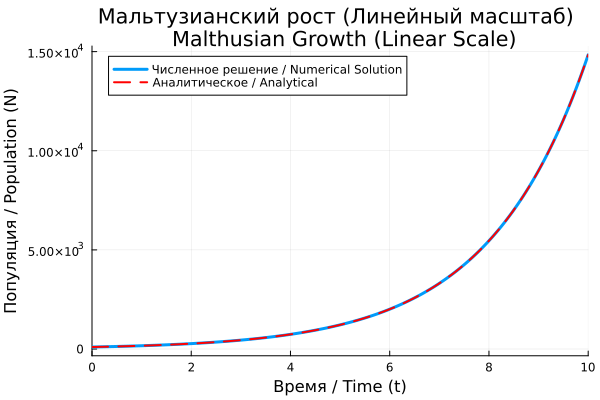

In [5]:
# ==============================================================================
# ПОСТРОЕНИЕ ГРАФИКОВ / PLOTTING
# ==============================================================================

# График 1: Линейный масштаб
# Plot 1: Linear Scale
p1 = plot(sol, 
          linewidth=3, 
          title="Мальтузианский рост (Линейный масштаб) \n Malthusian Growth (Linear Scale)",
          xlabel="Время / Time (t)", 
          ylabel="Популяция / Population (N)",
          label="Численное решение / Numerical Solution",
          legend=:topleft)

# Добавим аналитическое решение для проверки точности
# Add analytical solution to verify accuracy
t_analytic = range(tspan[1], tspan[2], length=100)
N_analytic = N0[1] .* exp.(r_value .* t_analytic)

plot!(t_analytic, N_analytic, 
      linewidth=2, 
      linestyle=:dash, 
      color=:red, 
      label="Аналитическое / Analytical")


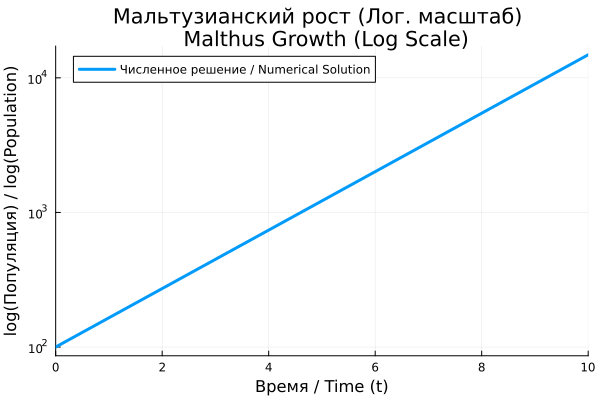

In [6]:

# График 2: Логарифмический масштаб по оси Y
# Plot 2: Logarithmic Scale on Y-axis
p2 = plot(sol, 
          linewidth=3, 
          title="Мальтузианский рост (Лог. масштаб) \n Malthus Growth (Log Scale)",
          xlabel="Время / Time (t)", 
          ylabel="log(Популяция) / log(Population)",
          yscale=:log10, # Логарифмическая шкала / Logarithmic scale
          label="Численное решение / Numerical Solution",
          legend=:topleft)


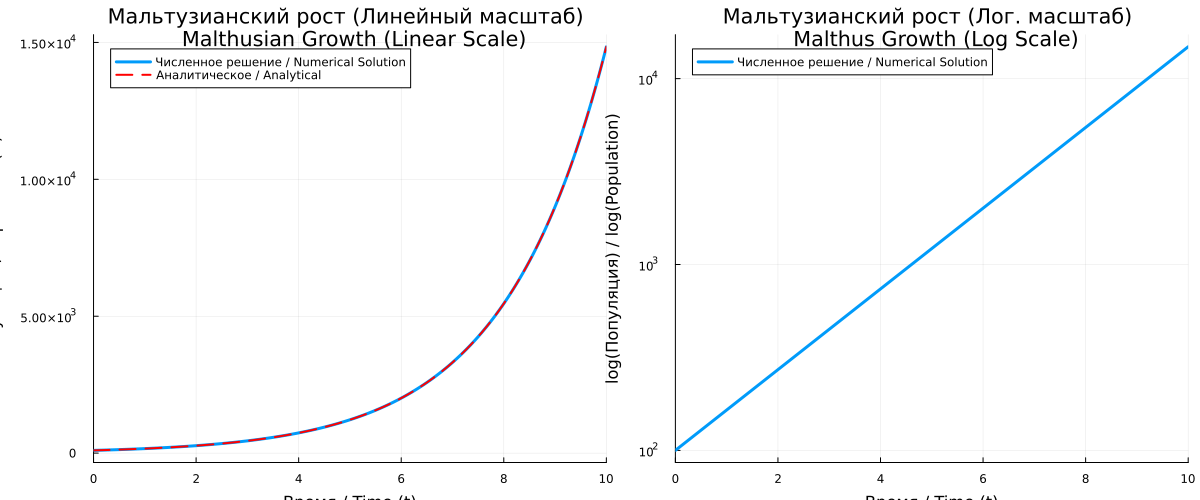

In [7]:

# Отображение графиков рядом
# Display plots side by side
plot(p1, p2, layout=(1, 2), size=(1200, 500))

## 4. Реальный пример: Рост бактерий

## 4. Real Example: Bacteria Growth

Мальтузианская модель хорошо описывает рост бактерий в чашке Петри на **начальном этапе**, когда ресурсов (питательной среды) много, а отходов мало.
The Malthusian model describes bacteria growth in a Petri dish well at the **initial stage**, when resources (nutrient medium) are abundant and waste is low.

**Пример данных / Example Data:**

*   Вид: *Escherichia coli*
*   Время генерации: ~20 минут.
*   Мы смоделируем рост в течение 5 часов.

Давайте посмотрим, как изменение параметра $r$ влияет на результат.
Let's see how changing the parameter $r$ affects the result.

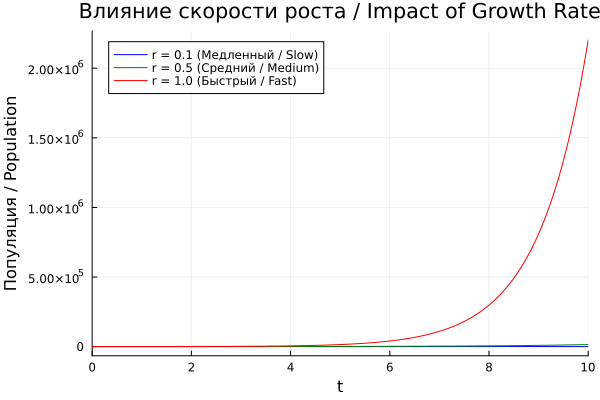

In [8]:
# ==============================================================================
# АНАЛИЗ ЧУВСТВИТЕЛЬНОСТИ К ПАРАМЕТРАМ / PARAMETER SENSITIVITY ANALYSIS
# ==============================================================================

# Разные скорости роста (медленный, средний, быстрый)
# Different growth rates (slow, medium, fast)
rates = [0.1, 0.5, 1.0]
colors = [:blue, :green, :red]
labels = ["r = 0.1 (Медленный / Slow)", "r = 0.5 (Средний / Medium)", "r = 1.0 (Быстрый / Fast)"]

plt_sensitivity = plot(title="Влияние скорости роста / Impact of Growth Rate",
                       xlabel="Время / Time",
                       ylabel="Популяция / Population",
                       legend=:topleft,
                       linewidth=3)

for i in eachindex(rates)
    # Обновляем параметры
    # Update parameters
    p_current = [rates[i]]
    
    # Пересоздаем и решаем задачу
    # Recreate and solve problem
    prob_current = ODEProblem(malthus_model!, N0, tspan, p_current)
    sol_current = solve(prob_current)
    
    # Добавляем на график
    # Add to plot
    plot!(plt_sensitivity, sol_current, 
          label=labels[i], 
          color=colors[i])
end

plt_sensitivity

## 5. Ограничения модели

## 5. Model Limitations

Хотя модель Мальтуса математически элегантна, она имеет серьезные биологические ограничения:
Although Malthus's model is mathematically elegant, it has serious biological limitations:

1.  **Бесконечный рост / Infinite Growth:** Модель предсказывает, что популяция будет расти вечно. В реальности ресурсы (еда, пространство) ограничены.
    The model predicts that the population will grow forever. In reality, resources (food, space) are limited.
2.  **Отсутствие конкуренции / No Competition:** Не учитывается внутривидовая конкуренция.
    Intraspecific competition is not accounted for.
3.  **Постоянная скорость / Constant Rate:** Параметр $r$ считается постоянным, но в реальности он зависит от плотности популяции и условий среды.
    Parameter $r$ is considered constant, but in reality, it depends on population density and environmental conditions.

**Когда использовать? / When to use?**

*   Краткосрочное прогнозирование (инкубационный период инфекции, начальная фаза роста культуры).
    Short-term forecasting (incubation period of infection, initial phase of culture growth).
*   Теоретический базис для обучения.
    Theoretical basis for education.
*   Моделирование клеток рака на ранних стадиях.
    Modeling cancer cells at early stages.

**Что дальше? / What's next?**
Для учета ограничений вводится **Логистическая модель (Ферхюльста)**, где добавляется "емкость среды" $K$.
To account for limitations, the **Logistic Model (Verhulst)** is introduced, where "carrying capacity" $K$ is added.

---

## 

## 6. Источники и литература

## 6. References and Literature

**Классические работы / Classical Works:**

1.  **Malthus, T. R. (1798).** *An Essay on the Principle of Population*. [Internet Archive Link](https://archive.org/details/anessayonprinci00maltgoog)
    *   Оригинальный труд, где была предложена идея экспоненциального роста населения.
    *   The original work where the idea of exponential population growth was proposed.

**Современные учебники и статьи / Modern Textbooks and Papers:**

2.  **Murray, J. D. (2002).** *Mathematical Biology I: An Introduction*. Springer.
    *   Стандартный учебник по биоматематике. Глава 1 подробно разбирает эту модель.
    *   Standard textbook on biomathematics. Chapter 1 discusses this model in detail.
3.  **Kot, M. (2001).** *Elements of Mathematical Ecology*. Cambridge University Press.
    *   Отличный ресурс для экологов, использующих Julia/Matlab.
    *   Great resource for ecologists using Julia/Matlab.

**Ресурсы по Julia / Julia Resources:**

4.  **DifferentialEquations.jl Documentation:** [https://docs.sciml.ai/DiffEqDocs/stable/](https://docs.sciml.ai/DiffEqDocs/stable/)
    *   Официальная документация решателя ОДУ.
    *   Official documentation for the ODE solver.
5.  **Julia for Biologists:** [https://juliabio.github.io/](https://juliabio.github.io/)
    *   Сообщество биологов, использующих Julia.
    *   Community of biologists using Julia.

## 7. Домашнее задание / Exercises

1.  **Изменение начальных условий:** Попробуйте изменить `N0` на 10 и на 1000. Как изменится время удвоения популяции?
    **Change Initial Conditions:** Try changing `N0` to 10 and 1000. How does the population doubling time change?
2.  **Отрицательный рост:** Установите `r = -0.5`. Что происходит с популяцией? Смоделируйте вымирание вида.
    **Negative Growth:** Set `r = -0.5`. What happens to the population? Model species extinction.
3.  **Сравнение с логистикой:** Попробуйте найти код логистического уравнения в документации `DifferentialEquations.jl` и сравните графики при больших $t$.
    **Comparison with Logistics:** Try finding the logistic equation code in `DifferentialEquations.jl` documentation and compare plots for large $t$.

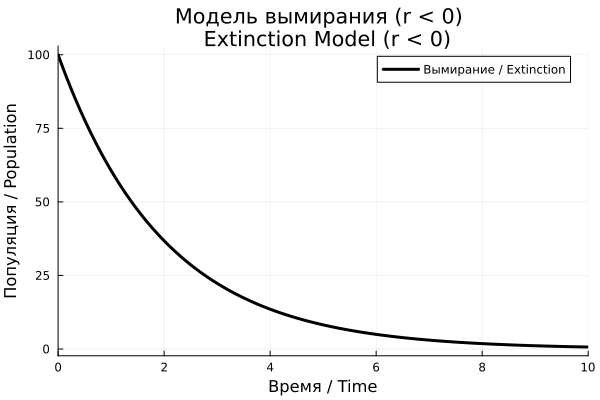

In [9]:
# ==============================================================================
# ПРИМЕР РЕШЕНИЯ УПРАЖНЕНИЯ 2: ОТРИЦАТЕЛЬНЫЙ РОСТ
# EXAMPLE SOLUTION FOR EXERCISE 2: NEGATIVE GROWTH
# ==============================================================================

# Параметры для вымирания
# Parameters for extinction
p_extinct = [-0.5] # r < 0
prob_extinct = ODEProblem(malthus_model!, N0, tspan, p_extinct)
sol_extinct = solve(prob_extinct)

# График вымирания
# Extinction Plot
plot(sol_extinct, 
     title="Модель вымирания (r < 0) \n Extinction Model (r < 0)",
     xlabel="Время / Time", 
     ylabel="Популяция / Population",
     linewidth=3,
     color=:black,
     label="Вымирание / Extinction")